In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
import hls4ml
import os
os.environ['PATH'] = '/opt/Xilinx/Vivado/2019.2/bin:' + os.environ['PATH']

2023-04-14 17:40:07.661636: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-14 17:40:07.661651: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/ej/workspace/hls4ml/hls4ml/hls4ml/converters/__init__.py:15: UserWarning: WARNING: Pytorch converter is not enabled!
  warnings.warn("WARNING: Pytorch converter is not enabled!")


In [2]:
file_str = 'Jan06_FlavFix_smear_1_std_xtd_zst.h5'
f5 = h5py.File(file_str, 'r')
x_train = np.array( f5['x_train'] )
y_train = to_categorical( np.array( f5['y_train'] ) )

n_classes = len(np.unique(y_train, axis=0))
np.random.seed(42)  # Set random seed
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

x_test = np.array( f5['x_test'] )
y_test = to_categorical ( np.array( f5['y_test'] ) )

y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

In [3]:
model = load_model('b_tag_model.h5')
model.summary()

2023-04-14 17:40:09.804458: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-14 17:40:09.804909: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-14 17:40:09.804955: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-04-14 17:40:09.804993: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-04-14 17:40:09.805028: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [4]:
# auc_arr = np.array([])


# precision = 'ap_fixed<{},8>'.format(18)
# dirc = 'b_tagging_precision/8int_{}frac'.format(18)
# config = hls4ml.utils.config_from_keras_model(model, granularity='model', default_precision=precision)
# config['Model']['ReuseFactor']=1
# config['Model']['Strategy']='Resource'
# hls_model = hls4ml.converters.convert_from_keras_model(model,
#                                                        hls_config=config,
#                                                        output_dir=dirc,
#                                                        part='xcvu13p-fhga2104-2L-e')
# hls_model.compile()
# x_test1=np.ascontiguousarray(x_test[0:100,:,:])
# y_keras = model.predict(x_test1)
# y_hls = hls_model.predict(x_test1)
# # Convert continuous data to binary data
# y_test_binary = np.where(y_keras > 0.5, 1, 0)
# # y_pred_binary = np.where(y_hls > 0.5, 1, 0)

# fpr, tpr, thresholds = roc_curve(y_test_binary.ravel(), y_hls.ravel())
# roc_auc = auc(fpr, tpr)
# auc_arr = np.append(auc_arr, roc_auc)
# print(auc_arr)

In [5]:
auc_arr = np.array([])
int_bit = 6
x_test1=np.ascontiguousarray(x_test[0:1000,:,:])
y_keras = model.predict(x_test1)
for i in range(2, 19, 2):
    precision = 'ap_fixed<{},{}>'.format((int_bit+i), int_bit)
    dirc = 'b_tagging_precision/{}int_{}frac'.format(int_bit, i)
    config = hls4ml.utils.config_from_keras_model(model, granularity='model', default_precision=precision)
    config['Model']['ReuseFactor']=1
    config['Model']['Strategy']='Resource'
    hls_model = hls4ml.converters.convert_from_keras_model(model,
                                                           hls_config=config,
                                                           output_dir=dirc,
                                                           part='xcvu13p-fhga2104-2L-e')
    hls_model.compile()
    y_hls = hls_model.predict(x_test1)
    # Convert continuous data to binary data
    y_test_binary = np.where(y_keras > 0.5, 1, 0)
    # y_pred_binary = np.where(y_hls > 0.5, 1, 0)

    fpr, tpr, thresholds = roc_curve(y_test_binary.ravel(), y_hls.ravel())
    roc_auc = auc(fpr, tpr)
    auc_arr = np.append(auc_arr, roc_auc)

32/32 [==============================] - 0s 2ms/step
Interpreting Model
Topology:
Layer name: input_2, layer type: Input
Layer name: multi_head_attention_2, layer type: MultiHeadAttention
Layer name: add_4, layer type: Add
Layer name: dense_8, layer type: Dense
  -> Activation (relu), layer name: dense_8
Layer name: dense_9, layer type: Dense
  -> Activation (linear), layer name: dense_9
Layer name: add_5, layer type: Add
Layer name: multi_head_attention_3, layer type: MultiHeadAttention
Layer name: add_6, layer type: Add
Layer name: dense_10, layer type: Dense
  -> Activation (relu), layer name: dense_10
Layer name: dense_11, layer type: Dense
  -> Activation (linear), layer name: dense_11
Layer name: add_7, layer type: Add
Layer name: multi_head_attention_4, layer type: MultiHeadAttention
Layer name: add_8, layer type: Add
Layer name: dense_12, layer type: Dense
  -> Activation (relu), layer name: dense_12
Layer name: dense_13, layer type: Dense
  -> Activation (linear), layer name: 

Interpreting Model
Topology:
Layer name: input_2, layer type: Input
Layer name: multi_head_attention_2, layer type: MultiHeadAttention
Layer name: add_4, layer type: Add
Layer name: dense_8, layer type: Dense
  -> Activation (relu), layer name: dense_8
Layer name: dense_9, layer type: Dense
  -> Activation (linear), layer name: dense_9
Layer name: add_5, layer type: Add
Layer name: multi_head_attention_3, layer type: MultiHeadAttention
Layer name: add_6, layer type: Add
Layer name: dense_10, layer type: Dense
  -> Activation (relu), layer name: dense_10
Layer name: dense_11, layer type: Dense
  -> Activation (linear), layer name: dense_11
Layer name: add_7, layer type: Add
Layer name: multi_head_attention_4, layer type: MultiHeadAttention
Layer name: add_8, layer type: Add
Layer name: dense_12, layer type: Dense
  -> Activation (relu), layer name: dense_12
Layer name: dense_13, layer type: Dense
  -> Activation (linear), layer name: dense_13
Layer name: add_9, layer type: Add
Layer nam

Interpreting Model
Topology:
Layer name: input_2, layer type: Input
Layer name: multi_head_attention_2, layer type: MultiHeadAttention
Layer name: add_4, layer type: Add
Layer name: dense_8, layer type: Dense
  -> Activation (relu), layer name: dense_8
Layer name: dense_9, layer type: Dense
  -> Activation (linear), layer name: dense_9
Layer name: add_5, layer type: Add
Layer name: multi_head_attention_3, layer type: MultiHeadAttention
Layer name: add_6, layer type: Add
Layer name: dense_10, layer type: Dense
  -> Activation (relu), layer name: dense_10
Layer name: dense_11, layer type: Dense
  -> Activation (linear), layer name: dense_11
Layer name: add_7, layer type: Add
Layer name: multi_head_attention_4, layer type: MultiHeadAttention
Layer name: add_8, layer type: Add
Layer name: dense_12, layer type: Dense
  -> Activation (relu), layer name: dense_12
Layer name: dense_13, layer type: Dense
  -> Activation (linear), layer name: dense_13
Layer name: add_9, layer type: Add
Layer nam

Done


In [6]:
print(auc_arr)
int6 = auc_arr

[0.46432411 0.53670243 0.51564275 0.54085692 0.54751443 0.54026693
 0.56595779 0.55363928 0.55592088]


In [7]:
auc_arr = np.array([])
int_bit = 7
x_test1=np.ascontiguousarray(x_test[0:1000,:,:])
y_keras = model.predict(x_test1)
for i in range(2, 19, 2):
    precision = 'ap_fixed<{},{}>'.format((int_bit+i), int_bit)
    dirc = 'b_tagging_precision/{}int_{}frac'.format(int_bit, i)
    config = hls4ml.utils.config_from_keras_model(model, granularity='model', default_precision=precision)
    config['Model']['ReuseFactor']=1
    config['Model']['Strategy']='Resource'
    hls_model = hls4ml.converters.convert_from_keras_model(model,
                                                           hls_config=config,
                                                           output_dir=dirc,
                                                           part='xcvu13p-fhga2104-2L-e')
    hls_model.compile()
    y_hls = hls_model.predict(x_test1)
    # Convert continuous data to binary data
    y_test_binary = np.where(y_keras > 0.5, 1, 0)
    # y_pred_binary = np.where(y_hls > 0.5, 1, 0)

    fpr, tpr, thresholds = roc_curve(y_test_binary.ravel(), y_hls.ravel())
    roc_auc = auc(fpr, tpr)
    auc_arr = np.append(auc_arr, roc_auc)

32/32 [==============================] - 0s 2ms/step
Interpreting Model
Topology:
Layer name: input_2, layer type: Input
Layer name: multi_head_attention_2, layer type: MultiHeadAttention
Layer name: add_4, layer type: Add
Layer name: dense_8, layer type: Dense
  -> Activation (relu), layer name: dense_8
Layer name: dense_9, layer type: Dense
  -> Activation (linear), layer name: dense_9
Layer name: add_5, layer type: Add
Layer name: multi_head_attention_3, layer type: MultiHeadAttention
Layer name: add_6, layer type: Add
Layer name: dense_10, layer type: Dense
  -> Activation (relu), layer name: dense_10
Layer name: dense_11, layer type: Dense
  -> Activation (linear), layer name: dense_11
Layer name: add_7, layer type: Add
Layer name: multi_head_attention_4, layer type: MultiHeadAttention
Layer name: add_8, layer type: Add
Layer name: dense_12, layer type: Dense
  -> Activation (relu), layer name: dense_12
Layer name: dense_13, layer type: Dense
  -> Activation (linear), layer name: 

Interpreting Model
Topology:
Layer name: input_2, layer type: Input
Layer name: multi_head_attention_2, layer type: MultiHeadAttention
Layer name: add_4, layer type: Add
Layer name: dense_8, layer type: Dense
  -> Activation (relu), layer name: dense_8
Layer name: dense_9, layer type: Dense
  -> Activation (linear), layer name: dense_9
Layer name: add_5, layer type: Add
Layer name: multi_head_attention_3, layer type: MultiHeadAttention
Layer name: add_6, layer type: Add
Layer name: dense_10, layer type: Dense
  -> Activation (relu), layer name: dense_10
Layer name: dense_11, layer type: Dense
  -> Activation (linear), layer name: dense_11
Layer name: add_7, layer type: Add
Layer name: multi_head_attention_4, layer type: MultiHeadAttention
Layer name: add_8, layer type: Add
Layer name: dense_12, layer type: Dense
  -> Activation (relu), layer name: dense_12
Layer name: dense_13, layer type: Dense
  -> Activation (linear), layer name: dense_13
Layer name: add_9, layer type: Add
Layer nam

Interpreting Model
Topology:
Layer name: input_2, layer type: Input
Layer name: multi_head_attention_2, layer type: MultiHeadAttention
Layer name: add_4, layer type: Add
Layer name: dense_8, layer type: Dense
  -> Activation (relu), layer name: dense_8
Layer name: dense_9, layer type: Dense
  -> Activation (linear), layer name: dense_9
Layer name: add_5, layer type: Add
Layer name: multi_head_attention_3, layer type: MultiHeadAttention
Layer name: add_6, layer type: Add
Layer name: dense_10, layer type: Dense
  -> Activation (relu), layer name: dense_10
Layer name: dense_11, layer type: Dense
  -> Activation (linear), layer name: dense_11
Layer name: add_7, layer type: Add
Layer name: multi_head_attention_4, layer type: MultiHeadAttention
Layer name: add_8, layer type: Add
Layer name: dense_12, layer type: Dense
  -> Activation (relu), layer name: dense_12
Layer name: dense_13, layer type: Dense
  -> Activation (linear), layer name: dense_13
Layer name: add_9, layer type: Add
Layer nam

In [8]:
print(auc_arr)
int7 = auc_arr

[0.39296005 0.546169   0.52984071 0.55371764 0.5841841  0.57268273
 0.56752818 0.57359324 0.55706264]


In [9]:
auc_arr = np.array([])
int_bit = 8
x_test1=np.ascontiguousarray(x_test[0:1000,:,:])
y_keras = model.predict(x_test1)
for i in range(2, 19, 2):
    precision = 'ap_fixed<{},{}>'.format((int_bit+i), int_bit)
    dirc = 'b_tagging_precision/{}int_{}frac'.format(int_bit, i)
    config = hls4ml.utils.config_from_keras_model(model, granularity='model', default_precision=precision)
    config['Model']['ReuseFactor']=1
    config['Model']['Strategy']='Resource'
    hls_model = hls4ml.converters.convert_from_keras_model(model,
                                                           hls_config=config,
                                                           output_dir=dirc,
                                                           part='xcvu13p-fhga2104-2L-e')
    hls_model.compile()
    y_hls = hls_model.predict(x_test1)
    # Convert continuous data to binary data
    y_test_binary = np.where(y_keras > 0.5, 1, 0)
    # y_pred_binary = np.where(y_hls > 0.5, 1, 0)

    fpr, tpr, thresholds = roc_curve(y_test_binary.ravel(), y_hls.ravel())
    roc_auc = auc(fpr, tpr)
    auc_arr = np.append(auc_arr, roc_auc)

32/32 [==============================] - 0s 2ms/step
Interpreting Model
Topology:
Layer name: input_2, layer type: Input
Layer name: multi_head_attention_2, layer type: MultiHeadAttention
Layer name: add_4, layer type: Add
Layer name: dense_8, layer type: Dense
  -> Activation (relu), layer name: dense_8
Layer name: dense_9, layer type: Dense
  -> Activation (linear), layer name: dense_9
Layer name: add_5, layer type: Add
Layer name: multi_head_attention_3, layer type: MultiHeadAttention
Layer name: add_6, layer type: Add
Layer name: dense_10, layer type: Dense
  -> Activation (relu), layer name: dense_10
Layer name: dense_11, layer type: Dense
  -> Activation (linear), layer name: dense_11
Layer name: add_7, layer type: Add
Layer name: multi_head_attention_4, layer type: MultiHeadAttention
Layer name: add_8, layer type: Add
Layer name: dense_12, layer type: Dense
  -> Activation (relu), layer name: dense_12
Layer name: dense_13, layer type: Dense
  -> Activation (linear), layer name: 

Done
Interpreting Model
Topology:
Layer name: input_2, layer type: Input
Layer name: multi_head_attention_2, layer type: MultiHeadAttention
Layer name: add_4, layer type: Add
Layer name: dense_8, layer type: Dense
  -> Activation (relu), layer name: dense_8
Layer name: dense_9, layer type: Dense
  -> Activation (linear), layer name: dense_9
Layer name: add_5, layer type: Add
Layer name: multi_head_attention_3, layer type: MultiHeadAttention
Layer name: add_6, layer type: Add
Layer name: dense_10, layer type: Dense
  -> Activation (relu), layer name: dense_10
Layer name: dense_11, layer type: Dense
  -> Activation (linear), layer name: dense_11
Layer name: add_7, layer type: Add
Layer name: multi_head_attention_4, layer type: MultiHeadAttention
Layer name: add_8, layer type: Add
Layer name: dense_12, layer type: Dense
  -> Activation (relu), layer name: dense_12
Layer name: dense_13, layer type: Dense
  -> Activation (linear), layer name: dense_13
Layer name: add_9, layer type: Add
Laye

Done
Interpreting Model
Topology:
Layer name: input_2, layer type: Input
Layer name: multi_head_attention_2, layer type: MultiHeadAttention
Layer name: add_4, layer type: Add
Layer name: dense_8, layer type: Dense
  -> Activation (relu), layer name: dense_8
Layer name: dense_9, layer type: Dense
  -> Activation (linear), layer name: dense_9
Layer name: add_5, layer type: Add
Layer name: multi_head_attention_3, layer type: MultiHeadAttention
Layer name: add_6, layer type: Add
Layer name: dense_10, layer type: Dense
  -> Activation (relu), layer name: dense_10
Layer name: dense_11, layer type: Dense
  -> Activation (linear), layer name: dense_11
Layer name: add_7, layer type: Add
Layer name: multi_head_attention_4, layer type: MultiHeadAttention
Layer name: add_8, layer type: Add
Layer name: dense_12, layer type: Dense
  -> Activation (relu), layer name: dense_12
Layer name: dense_13, layer type: Dense
  -> Activation (linear), layer name: dense_13
Layer name: add_9, layer type: Add
Laye

Done


In [10]:
print(auc_arr)
int8 = auc_arr

[0.53858297 0.63936893 0.65927183 0.77892678 0.84366009 0.84175444
 0.84794126 0.84357737 0.84838546]


In [11]:
auc_arr = np.array([])
int_bit = 9
x_test1=np.ascontiguousarray(x_test[0:1000,:,:])
y_keras = model.predict(x_test1)
for i in range(2, 19, 2):
    precision = 'ap_fixed<{},{}>'.format((int_bit+i), int_bit)
    dirc = 'b_tagging_precision/{}int_{}frac'.format(int_bit, i)
    config = hls4ml.utils.config_from_keras_model(model, granularity='model', default_precision=precision)
    config['Model']['ReuseFactor']=1
    config['Model']['Strategy']='Resource'
    hls_model = hls4ml.converters.convert_from_keras_model(model,
                                                           hls_config=config,
                                                           output_dir=dirc,
                                                           part='xcvu13p-fhga2104-2L-e')
    hls_model.compile()
    y_hls = hls_model.predict(x_test1)
    # Convert continuous data to binary data
    y_test_binary = np.where(y_keras > 0.5, 1, 0)
    # y_pred_binary = np.where(y_hls > 0.5, 1, 0)

    fpr, tpr, thresholds = roc_curve(y_test_binary.ravel(), y_hls.ravel())
    roc_auc = auc(fpr, tpr)
    auc_arr = np.append(auc_arr, roc_auc)

32/32 [==============================] - 0s 2ms/step
Interpreting Model
Topology:
Layer name: input_2, layer type: Input
Layer name: multi_head_attention_2, layer type: MultiHeadAttention
Layer name: add_4, layer type: Add
Layer name: dense_8, layer type: Dense
  -> Activation (relu), layer name: dense_8
Layer name: dense_9, layer type: Dense
  -> Activation (linear), layer name: dense_9
Layer name: add_5, layer type: Add
Layer name: multi_head_attention_3, layer type: MultiHeadAttention
Layer name: add_6, layer type: Add
Layer name: dense_10, layer type: Dense
  -> Activation (relu), layer name: dense_10
Layer name: dense_11, layer type: Dense
  -> Activation (linear), layer name: dense_11
Layer name: add_7, layer type: Add
Layer name: multi_head_attention_4, layer type: MultiHeadAttention
Layer name: add_8, layer type: Add
Layer name: dense_12, layer type: Dense
  -> Activation (relu), layer name: dense_12
Layer name: dense_13, layer type: Dense
  -> Activation (linear), layer name: 

Interpreting Model
Topology:
Layer name: input_2, layer type: Input
Layer name: multi_head_attention_2, layer type: MultiHeadAttention
Layer name: add_4, layer type: Add
Layer name: dense_8, layer type: Dense
  -> Activation (relu), layer name: dense_8
Layer name: dense_9, layer type: Dense
  -> Activation (linear), layer name: dense_9
Layer name: add_5, layer type: Add
Layer name: multi_head_attention_3, layer type: MultiHeadAttention
Layer name: add_6, layer type: Add
Layer name: dense_10, layer type: Dense
  -> Activation (relu), layer name: dense_10
Layer name: dense_11, layer type: Dense
  -> Activation (linear), layer name: dense_11
Layer name: add_7, layer type: Add
Layer name: multi_head_attention_4, layer type: MultiHeadAttention
Layer name: add_8, layer type: Add
Layer name: dense_12, layer type: Dense
  -> Activation (relu), layer name: dense_12
Layer name: dense_13, layer type: Dense
  -> Activation (linear), layer name: dense_13
Layer name: add_9, layer type: Add
Layer nam

Interpreting Model
Topology:
Layer name: input_2, layer type: Input
Layer name: multi_head_attention_2, layer type: MultiHeadAttention
Layer name: add_4, layer type: Add
Layer name: dense_8, layer type: Dense
  -> Activation (relu), layer name: dense_8
Layer name: dense_9, layer type: Dense
  -> Activation (linear), layer name: dense_9
Layer name: add_5, layer type: Add
Layer name: multi_head_attention_3, layer type: MultiHeadAttention
Layer name: add_6, layer type: Add
Layer name: dense_10, layer type: Dense
  -> Activation (relu), layer name: dense_10
Layer name: dense_11, layer type: Dense
  -> Activation (linear), layer name: dense_11
Layer name: add_7, layer type: Add
Layer name: multi_head_attention_4, layer type: MultiHeadAttention
Layer name: add_8, layer type: Add
Layer name: dense_12, layer type: Dense
  -> Activation (relu), layer name: dense_12
Layer name: dense_13, layer type: Dense
  -> Activation (linear), layer name: dense_13
Layer name: add_9, layer type: Add
Layer nam

In [12]:
print(auc_arr)
int9 = auc_arr

[0.73368904 0.69449178 0.77226709 0.86087651 0.94648248 0.95984255
 0.96721345 0.96670263 0.96285774]


In [13]:
auc_arr = np.array([])
int_bit = 10
x_test1=np.ascontiguousarray(x_test[0:1000,:,:])
y_keras = model.predict(x_test1)
for i in range(2, 19, 2):
    precision = 'ap_fixed<{},{}>'.format((int_bit+i), int_bit)
    dirc = 'b_tagging_precision/{}int_{}frac'.format(int_bit, i)
    config = hls4ml.utils.config_from_keras_model(model, granularity='model', default_precision=precision)
    config['Model']['ReuseFactor']=1
    config['Model']['Strategy']='Resource'
    hls_model = hls4ml.converters.convert_from_keras_model(model,
                                                           hls_config=config,
                                                           output_dir=dirc,
                                                           part='xcvu13p-fhga2104-2L-e')
    hls_model.compile()
    y_hls = hls_model.predict(x_test1)
    # Convert continuous data to binary data
    y_test_binary = np.where(y_keras > 0.5, 1, 0)
    # y_pred_binary = np.where(y_hls > 0.5, 1, 0)

    fpr, tpr, thresholds = roc_curve(y_test_binary.ravel(), y_hls.ravel())
    roc_auc = auc(fpr, tpr)
    auc_arr = np.append(auc_arr, roc_auc)

32/32 [==============================] - 0s 2ms/step
Interpreting Model
Topology:
Layer name: input_2, layer type: Input
Layer name: multi_head_attention_2, layer type: MultiHeadAttention
Layer name: add_4, layer type: Add
Layer name: dense_8, layer type: Dense
  -> Activation (relu), layer name: dense_8
Layer name: dense_9, layer type: Dense
  -> Activation (linear), layer name: dense_9
Layer name: add_5, layer type: Add
Layer name: multi_head_attention_3, layer type: MultiHeadAttention
Layer name: add_6, layer type: Add
Layer name: dense_10, layer type: Dense
  -> Activation (relu), layer name: dense_10
Layer name: dense_11, layer type: Dense
  -> Activation (linear), layer name: dense_11
Layer name: add_7, layer type: Add
Layer name: multi_head_attention_4, layer type: MultiHeadAttention
Layer name: add_8, layer type: Add
Layer name: dense_12, layer type: Dense
  -> Activation (relu), layer name: dense_12
Layer name: dense_13, layer type: Dense
  -> Activation (linear), layer name: 

Interpreting Model
Topology:
Layer name: input_2, layer type: Input
Layer name: multi_head_attention_2, layer type: MultiHeadAttention
Layer name: add_4, layer type: Add
Layer name: dense_8, layer type: Dense
  -> Activation (relu), layer name: dense_8
Layer name: dense_9, layer type: Dense
  -> Activation (linear), layer name: dense_9
Layer name: add_5, layer type: Add
Layer name: multi_head_attention_3, layer type: MultiHeadAttention
Layer name: add_6, layer type: Add
Layer name: dense_10, layer type: Dense
  -> Activation (relu), layer name: dense_10
Layer name: dense_11, layer type: Dense
  -> Activation (linear), layer name: dense_11
Layer name: add_7, layer type: Add
Layer name: multi_head_attention_4, layer type: MultiHeadAttention
Layer name: add_8, layer type: Add
Layer name: dense_12, layer type: Dense
  -> Activation (relu), layer name: dense_12
Layer name: dense_13, layer type: Dense
  -> Activation (linear), layer name: dense_13
Layer name: add_9, layer type: Add
Layer nam

Interpreting Model
Topology:
Layer name: input_2, layer type: Input
Layer name: multi_head_attention_2, layer type: MultiHeadAttention
Layer name: add_4, layer type: Add
Layer name: dense_8, layer type: Dense
  -> Activation (relu), layer name: dense_8
Layer name: dense_9, layer type: Dense
  -> Activation (linear), layer name: dense_9
Layer name: add_5, layer type: Add
Layer name: multi_head_attention_3, layer type: MultiHeadAttention
Layer name: add_6, layer type: Add
Layer name: dense_10, layer type: Dense
  -> Activation (relu), layer name: dense_10
Layer name: dense_11, layer type: Dense
  -> Activation (linear), layer name: dense_11
Layer name: add_7, layer type: Add
Layer name: multi_head_attention_4, layer type: MultiHeadAttention
Layer name: add_8, layer type: Add
Layer name: dense_12, layer type: Dense
  -> Activation (relu), layer name: dense_12
Layer name: dense_13, layer type: Dense
  -> Activation (linear), layer name: dense_13
Layer name: add_9, layer type: Add
Layer nam

In [14]:
print(auc_arr)
int10 = auc_arr

[0.77604427 0.69878934 0.78143526 0.87810495 0.96422364 0.97463431
 0.97693775 0.97662787 0.97592977]


In [15]:
# int6 = [0.47048313, 0.54593696, 0.50580987, 0.54525205, 0.54459691, 0.53804555, 0.56119866, 0.55998368, 0.55203569]
# int7 = [0.38332321, 0.5560082, 0.52509767, 0.56732419, 0.57966457, 0.54601737, 0.56148752, 0.55522203, 0.53846543]
# int8 = [0.52245033, 0.65903731, 0.67716076, 0.80291714, 0.8290005, 0.82665392, 0.82989685, 0.84404779, 0.85429472]
# int9 = [0.72904755, 0.69074888, 0.76717946, 0.86341004, 0.94572494, 0.96137972, 0.9638335, 0.9603047, 0.95976868]
# int10= [0.78727428, 0.69239565, 0.7719292, 0.8799165, 0.9568027, 0.97120081, 0.97114423, 0.96752311, 0.96376501]

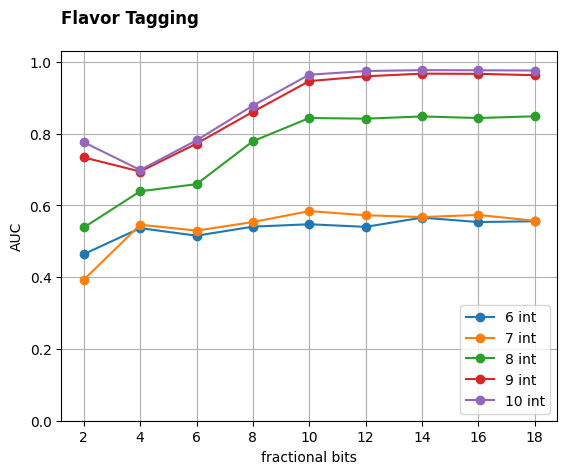

In [18]:
fig, ax = plt.subplots()

ax.plot(x_axis, int6, "-o", label = "6 int")
ax.plot(x_axis, int7, "-o", label = '7 int')
ax.plot(x_axis, int8, "-o", label = '8 int')
ax.plot(x_axis, int9, "-o", label = '9 int')
ax.plot(x_axis, int10, "-o", label = '10 int')

ax.legend(loc='lower right')
ax.set_xlabel("fractional bits")
ax.set_ylabel("AUC")

# Set the title and adjust its position
ax.set_title("Flavor Tagging", loc='left', fontweight='bold', pad=20)

ax.grid()
ax.set_ylim([0.0, 1.03])
plt.show()

In [ ]:
# layer_name = 'multi_head_attention_2'
# intermediate_layer_model = keras.Model(inputs=model.input,
#                                        outputs=model.get_layer(layer_name).output)
# intermediate_output = intermediate_layer_model(x_test1)
# print(intermediate_output[0].numpy().round(5))